In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
image1 = Image.open('1.gif')
image1 = image1.resize((512, 512))
array1 = np.array(image1)

array([[ 9,  9,  6, ...,  9,  9,  9],
       [ 9, 10,  9, ..., 12,  9,  9],
       [ 9, 11,  7, ..., 10,  8,  8],
       ...,
       [ 7,  6,  6, ...,  6,  7,  5],
       [ 8,  7,  8, ...,  6,  7,  5],
       [ 9, 10, 10, ...,  6,  6,  5]], dtype=uint8)

In [ ]:
river_pts=pd.read_excel('data_river.xlsx',header=None)
river_pts=np.resize(river_pts,(2,50))
river_pts=river_pts.transpose()
for i in range(50):
  river_pts[i][:2]-= 1
river_points=np.array(river_pts)

In [ ]:
nonriver_points = pd.read_excel('data_nonriver.xlsx',header=None)
nonriver_points = np.resize(nonriver_points,(2,100))
nonriver_points = nonriver_points.transpose()
for i in range(100):
  nonriver_points[i][:2]-= 1
nonriver_points = np.array(nonriver_points)
total_data = np.vstack((nonriver_points,river_points))
cases = [0 if i<=99 else 1 for i in range(150)]

In [ ]:
input_data = []
for x,y in total_data:
  input_data.append([array1[x][y]])
input_data = np.array(input_data)
row,col = input_data.shape
print(row,col)

150 1


In [ ]:
learn_rate = 0.001
iterations = 10000
w = np.zeros((col),dtype=float)
b = 0
cases = np.where(np.array(cases) <= 0, -1, 1)
for _ in range(iterations):
  for ind,x in enumerate(input_data):
    linear_output = np.dot(x,w) + b
    y_predicted = np.where(linear_output > 0,1,-1)

    update = learn_rate*(cases[ind]-y_predicted)
    w += update*x
    b += update
print("weight : ",w,"bias : ",b)
output_mat=np.zeros((512,512))
l=[]
for i in range(512):
  for j in range(512):
    l=np.array([array1[i][j]])
    if(np.dot(l,w)-b)>=1:
      output_mat[i][j]=255

weight :  [0.048] bias :  -0.3860000000000003


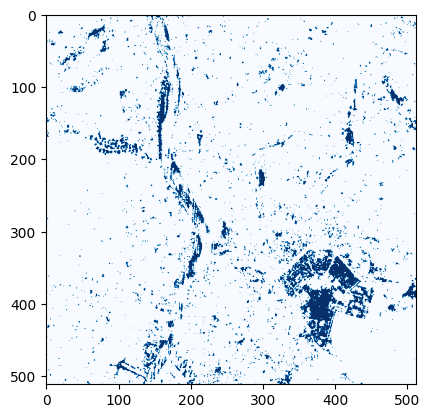

In [ ]:
plt.imshow(output_mat,cmap='Blues')